In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from scipy.io import arff

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'pepal length', 'pepal width'])
df_iris = pd.concat([df_iris, pd.DataFrame(iris.target, columns=['name'])], axis=1 )

In [3]:
data1 = arff.loadarff('1year.arff')
data2 = arff.loadarff('2year.arff')
data3 = arff.loadarff('3year.arff')
data4 = arff.loadarff('4year.arff')
data5 = arff.loadarff('5year.arff')
df_bank = pd.DataFrame(data1[0])
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data5[0]), ignore_index = True))

df_bank.loc[df_bank['class'] == b'1','class'] = 1
df_bank.loc[df_bank['class'] == b'0','class'] = 0

df_bank['class'] = df_bank['class'].astype('int')

# for column in df_bank.iloc[:, :-1]:
#     median = df_bank[column].median()
#     df_bank = df_bank.fillna(df_bank[column].fillna(median).to_frame())


C:\Users\Daniel\AppData\Local\Temp\ipykernel_8760\139802419.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data2[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8760\139802419.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data3[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8760\139802419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bank = pd.DataFrame(df_bank.append(pd.DataFrame(data4[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8760\139802419.py:10: FutureWarning: The frame.append method is deprecated and will be removed from 

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

def run_classification_tree(df, criterion='gini', max_depth=5, min_samples_leaf=1, ccp_alpha=0.0, class_weight = None, cv = 3, isStratified = False, print_metrics = True):
    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, ccp_alpha=ccp_alpha, class_weight=class_weight)
    clf = Pipeline([('imputate', SimpleImputer(missing_values=np.nan, strategy='mean')), ('clf', clf)])
    clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = clf.predict(df_test.iloc[:, :-1])

    f1 = f1_score(y_true, y_pred, average='weighted')

    strat_k_fold = None
    if isStratified:
        strat_k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    else:
        strat_k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    cross_val = cross_val_score(clf, df.iloc[:, :-1], df.iloc[:, -1], cv=strat_k_fold)
    cross_val = cross_val.mean()

    if print_metrics:
        print(skmet.classification_report(y_true, y_pred))
        print('Cross val: ', cross_val)

    return {'f1':f1, 'cross-val': cross_val, 'tree-clf': clf.named_steps['clf']}

run_classification_tree(df_iris, cv = 3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Cross val:  0.9466666666666667


{'f1': 0.98,
 'cross-val': 0.9466666666666667,
 'tree-clf': DecisionTreeClassifier(max_depth=5)}

# Sprawdzenie criterion (f1-score)

In [5]:

# criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 3, 5, 10]
# min_samples_leaf_list = [1, 2, 5, 10]
# ccp_alpha_list = [0.0, 0.01, 0.1, 0.5]

score_metric = 'f1'
criterion_vals = ['gini', 'entropy']
results_list_criterion = [
[run_classification_tree (df_iris, criterion = c, print_metrics = False) for c in criterion_vals],
[run_classification_tree (df_bank, criterion = c, print_metrics = False) for c in criterion_vals]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_criterion], index=['IRIS', 'PBC'], columns=criterion_vals)

results_df

,gini,entropy
IRIS,0.980000,0.960000
PBC,0.954137,0.952987


<Axes: >

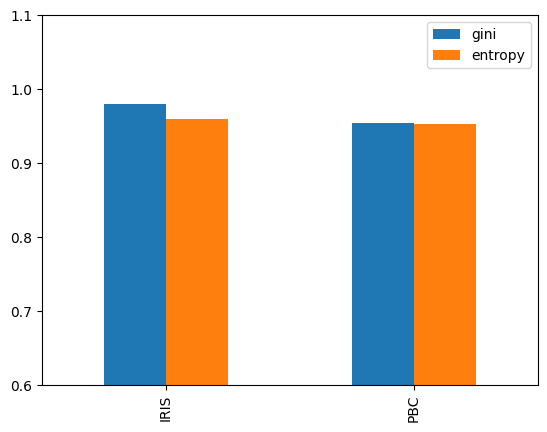

In [48]:
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_criterion], index=['IRIS', 'PBC'], columns=criterion_vals)
results_df.plot(kind="bar", ylim = (0.6, 1.1))

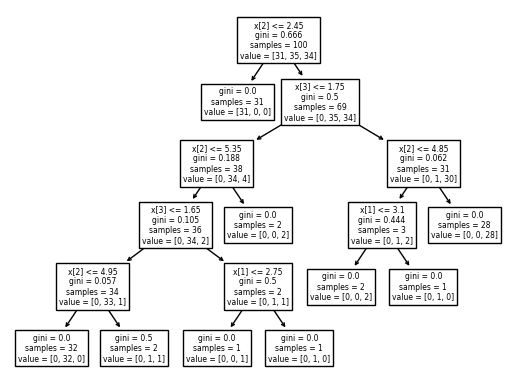

In [7]:
_ = plot_tree(results_list_criterion[0][0]['tree-clf'])


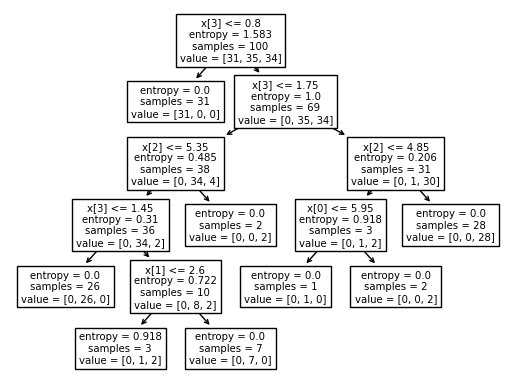

In [8]:
_ = plot_tree(results_list_criterion[0][1]['tree-clf'])

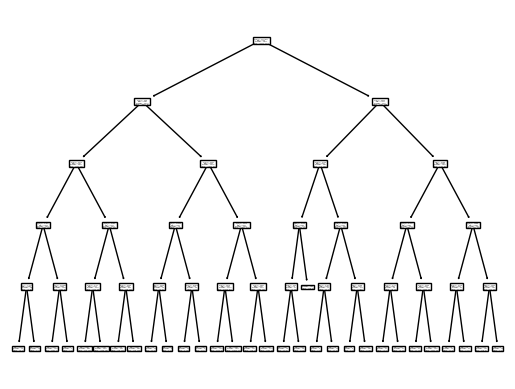

In [9]:
_ = plot_tree(results_list_criterion[1][0]['tree-clf'])

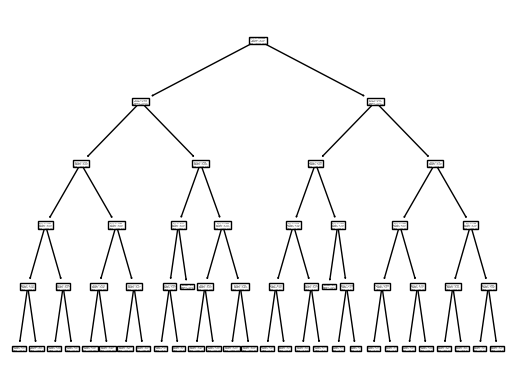

In [10]:
_ = plot_tree(results_list_criterion[1][1]['tree-clf'])

# Sprawdzenie max depth (f1-score)

In [54]:

# criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 3, 5, 10]
# min_samples_leaf_list = [1, 2, 5, 10]
# ccp_alpha_list = [0.0, 0.01, 0.1, 0.5]

score_metric = 'f1'
max_depth_vals = [None, 3, 5, 10, 30]
results_list_max_depth = [
[run_classification_tree (df_iris, max_depth = c, print_metrics = False) for c in max_depth_vals],
[run_classification_tree (df_bank, max_depth = c, print_metrics = False) for c in max_depth_vals]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_max_depth], index=['IRIS', 'PBC'], columns=max_depth_vals)

results_df

,NaN,3.0,5.0,10.0,30.0
IRIS,0.960000,0.980000,0.980000,0.960000,0.980000
PBC,0.948323,0.950398,0.954821,0.959745,0.949329


<Axes: >

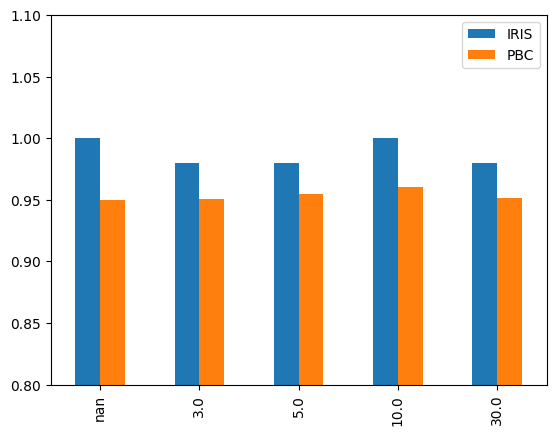

In [12]:
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_max_depth], index=['IRIS', 'PBC'], columns=max_depth_vals)
results_df.transpose().plot(kind="bar", ylim = (0.8, 1.1))

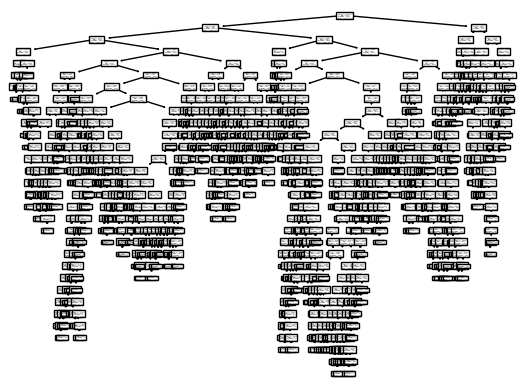

In [55]:
_ = plot_tree(results_list_max_depth[1][0]['tree-clf'])

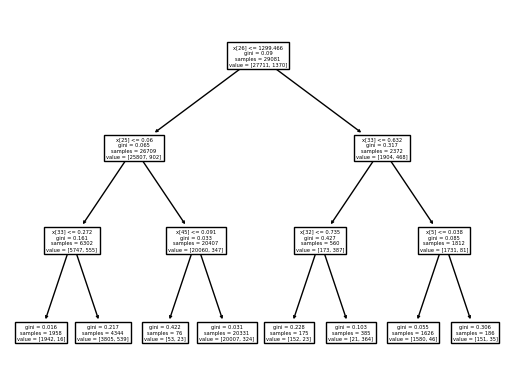

In [13]:
_ = plot_tree(results_list_max_depth[1][1]['tree-clf'])

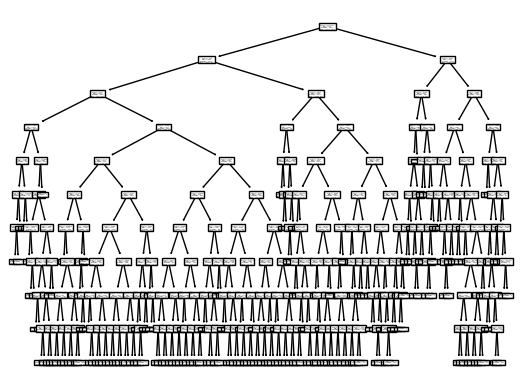

In [14]:
_ = plot_tree(results_list_max_depth[1][3]['tree-clf'])

# Sprawdzenie min_samples_leaf (f1-score)

In [56]:

# criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 3, 5, 10]
# min_samples_leaf_list = [1, 2, 5, 10]
# ccp_alpha_list = [0.0, 0.01, 0.1, 0.5]

score_metric = 'f1'
min_samples_leaf_vals = [1, 5, 10, 50, 100]
results_list_min_samples_leaf = [
[run_classification_tree (df_iris, min_samples_leaf = c, print_metrics = False) for c in min_samples_leaf_vals],
[run_classification_tree (df_bank, min_samples_leaf = c, print_metrics = False) for c in min_samples_leaf_vals]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_min_samples_leaf], index=['IRIS', 'PBC'], columns=min_samples_leaf_vals)

results_df

,1,5,10,50,100
IRIS,0.98000,1.000000,0.980000,0.581949,0.138462
PBC,0.95488,0.954368,0.953974,0.951128,0.950398


<Axes: >

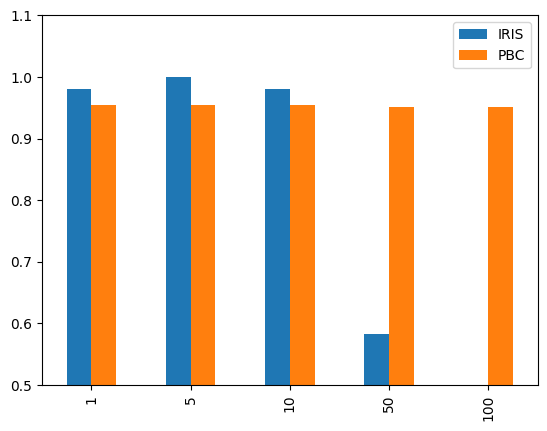

In [16]:
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_min_samples_leaf], index=['IRIS', 'PBC'], columns=min_samples_leaf_vals)
results_df.transpose().plot(kind="bar", ylim = (0.5, 1.1))

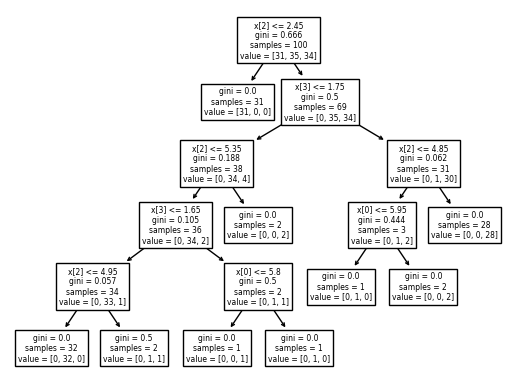

In [17]:
_ = plot_tree(results_list_min_samples_leaf[0][0]['tree-clf'])

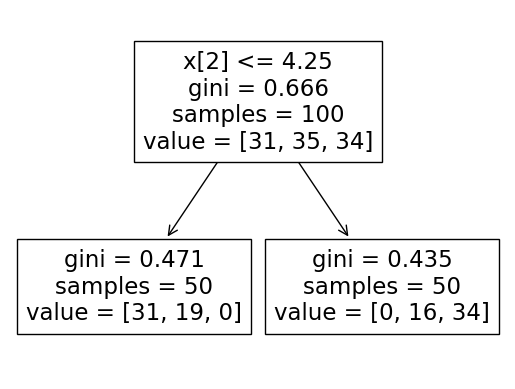

In [18]:
_ = plot_tree(results_list_min_samples_leaf[0][3]['tree-clf'])

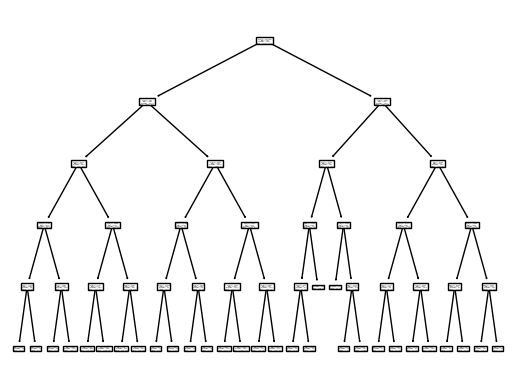

In [19]:
_ = plot_tree(results_list_min_samples_leaf[1][2]['tree-clf'])

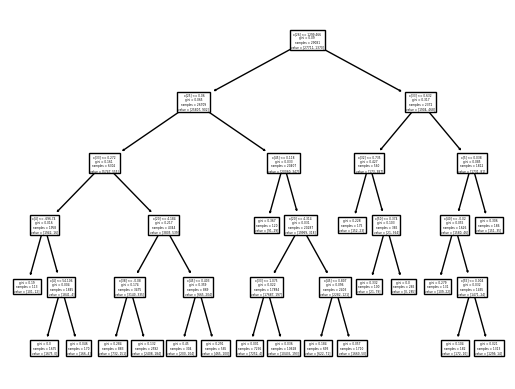

In [20]:
_ = plot_tree(results_list_min_samples_leaf[1][4]['tree-clf'])

# Sprawdzenie cpp_alpha (f1-score)

In [21]:

# criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 3, 5, 10]
# min_samples_leaf_list = [1, 2, 5, 10]
# ccp_alpha_list = [0.0, 0.01, 0.1, 0.5]

score_metric = 'f1'
ccp_alpha_vals = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75]
results_list_ccp_alpha = [
[run_classification_tree (df_iris, ccp_alpha = c, print_metrics = False) for c in ccp_alpha_vals],
[run_classification_tree (df_bank, ccp_alpha = c, print_metrics = False) for c in ccp_alpha_vals]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_ccp_alpha], index=['IRIS', 'PBC'], columns=ccp_alpha_vals)

results_df

,0.0000,0.0001,0.0010,0.0100,0.1000,0.2500,0.5000,0.7500
IRIS,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.138462,0.138462
PBC,0.954595,0.954309,0.950398,0.925147,0.925147,0.925147,0.925147,0.925147


<Axes: >

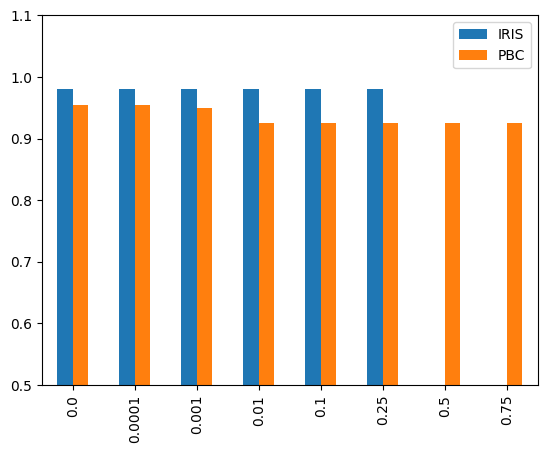

In [22]:
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_ccp_alpha], index=['IRIS', 'PBC'], columns=ccp_alpha_vals)
results_df.transpose().plot(kind="bar", ylim = (0.5, 1.1))

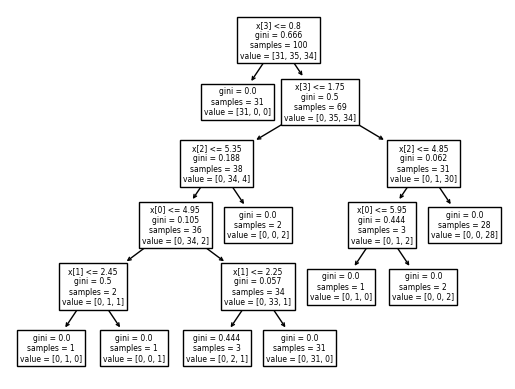

In [23]:
_ = plot_tree(results_list_ccp_alpha[0][0]['tree-clf'])

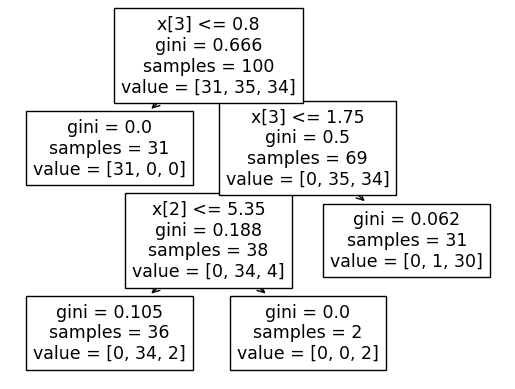

In [24]:
_ = plot_tree(results_list_ccp_alpha[0][3]['tree-clf'])

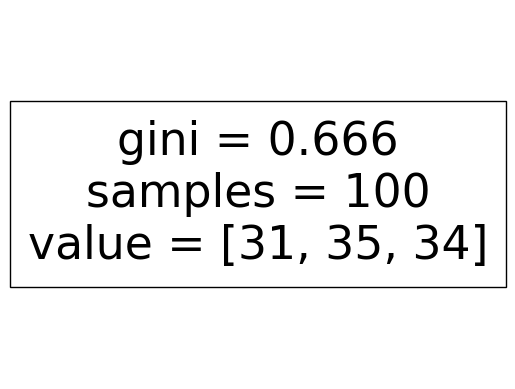

In [25]:
_ = plot_tree(results_list_ccp_alpha[0][7]['tree-clf'])

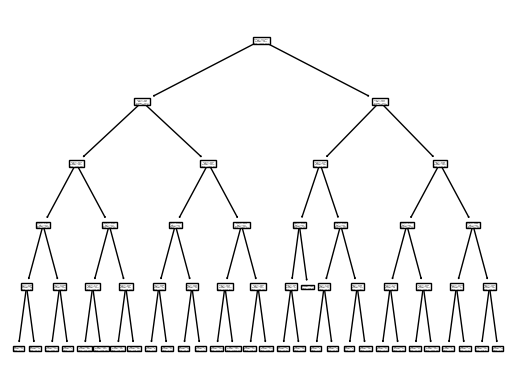

In [26]:
_ = plot_tree(results_list_ccp_alpha[1][0]['tree-clf'])

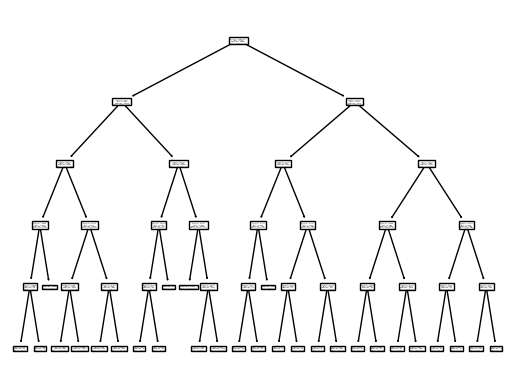

In [27]:
_ = plot_tree(results_list_ccp_alpha[1][1]['tree-clf'])

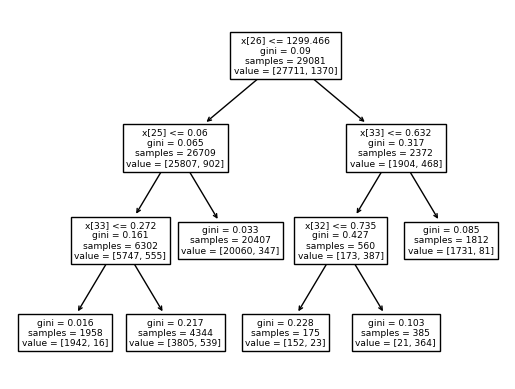

In [28]:
_ = plot_tree(results_list_ccp_alpha[1][2]['tree-clf'])

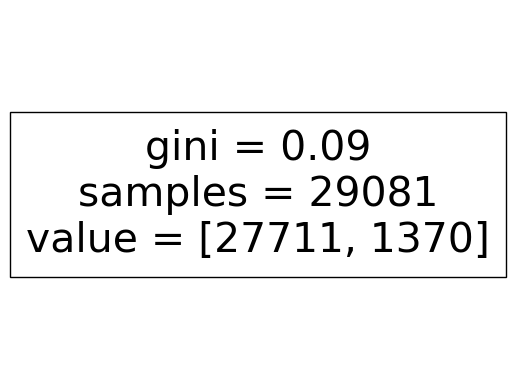

In [29]:
_ = plot_tree(results_list_ccp_alpha[1][3]['tree-clf'])

# Strat cross val and cross val

In [30]:
score_metric = 'cross-val'
strs = [True, False]

results_df_score = [
[run_classification_tree (df_iris, isStratified= s, print_metrics = False) for s in strs],
[run_classification_tree (df_bank, isStratified= s, print_metrics = False) for s in strs]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_df_score], index=['IRIS', 'PBC'], columns=['Stratified','Not Stratified'])

results_df

,Stratified,Not Stratified
IRIS,0.953333,0.946667
PBC,0.965626,0.964336


<Axes: >

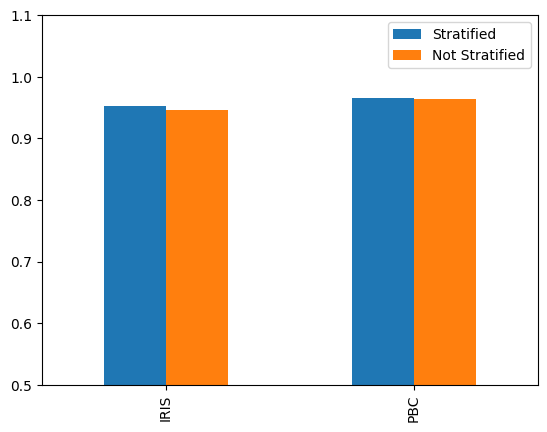

In [31]:
results_df.plot(kind="bar", ylim = (0.5, 1.1))

In [32]:
run_classification_tree (df_iris, isStratified= False, print_metrics = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Cross val:  0.9466666666666667


{'f1': 0.98,
 'cross-val': 0.9466666666666667,
 'tree-clf': DecisionTreeClassifier(max_depth=5)}

# Sprawdzenie class_weight (f1)

In [33]:

# criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 3, 5, 10]
# min_samples_leaf_list = [1, 2, 5, 10]
# ccp_alpha_list = [0.0, 0.01, 0.1, 0.5]

score_metric = 'f1'
class_weight_vals = [None, 'balanced']
results_list_class_weight = [
[run_classification_tree (df_iris, class_weight = c, print_metrics = False) for c in class_weight_vals],
[run_classification_tree (df_bank, class_weight = c, print_metrics = False) for c in class_weight_vals]
]

results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_class_weight], index=['IRIS', 'PBC'], columns=class_weight_vals)

results_df

,None,balanced
IRIS,0.980000,0.980000
PBC,0.954364,0.851311


<Axes: >

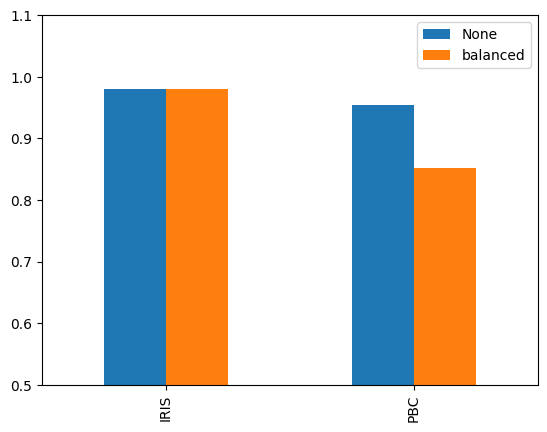

In [34]:
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_class_weight], index=['IRIS', 'PBC'], columns=class_weight_vals)
results_df.plot(kind="bar", ylim = (0.5, 1.1))

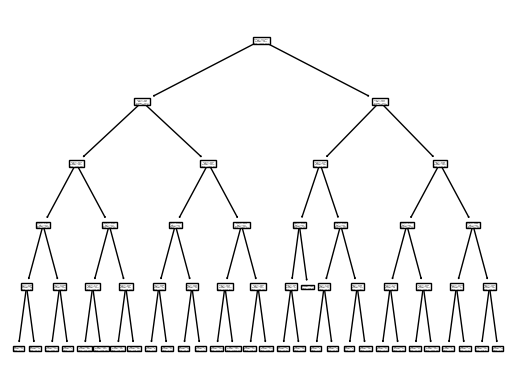

In [35]:
_ = plot_tree(results_list_ccp_alpha[1][0]['tree-clf'])

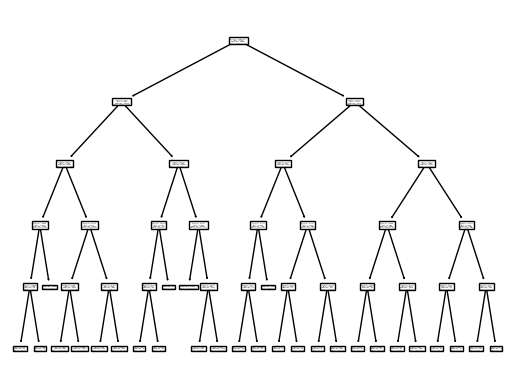

In [36]:
_ = plot_tree(results_list_ccp_alpha[1][1]['tree-clf'])

# Indywidualne wagi

In [37]:
df_iris.iloc[:, -1].value_counts()

0    50
1    50
2    50
Name: name, dtype: int64

In [38]:
score_metric = 'f1'
class_weight_vals_iris = [{0: 1, 1: 1, 2: 1}, {0: 1, 1: 1, 2: 2}, {0: 1, 1: 2, 2: 3}, {0: 1, 1: 5, 2: 5}]
results_list_class_weight_iris = [
[run_classification_tree (df_iris, class_weight = c, print_metrics = False) for c in class_weight_vals_iris]
]

class_weight_vals_labels = ['-'.join([str(b) for b in a.values()]) for a in class_weight_vals_iris]
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_class_weight_iris], index=['IRIS'], columns=class_weight_vals_labels)

results_df

,1-1-1,1-1-2,1-2-3,1-5-5
IRIS,0.98,0.98,1.0,0.98


<Axes: >

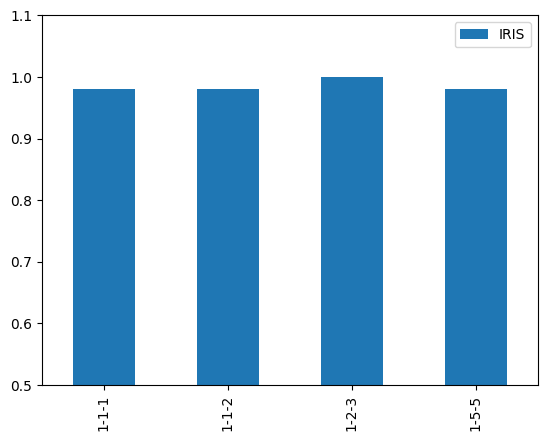

In [39]:
results_df.transpose().plot(kind="bar", ylim = (0.5, 1.1))

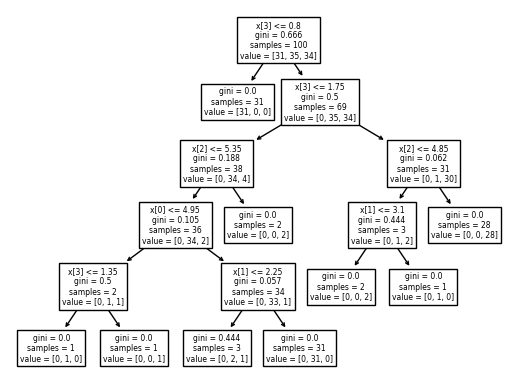

In [40]:
_ = plot_tree(results_list_class_weight_iris[0][0]['tree-clf'])

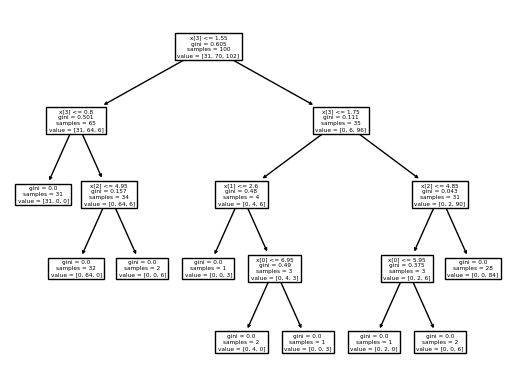

In [41]:
_ = plot_tree(results_list_class_weight_iris[0][2]['tree-clf'])

In [42]:
df_bank.iloc[:, -1].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [43]:
score_metric = 'f1'
class_weight_vals_bank = [{0: 10, 1: 1}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 5, 1: 100}, {0: 5, 1: 200}, {0: 5, 1: 500}
                          , {0: 5, 1: 1000}]
results_list_class_weight_bank = [
[run_classification_tree (df_bank, class_weight = c, print_metrics = False) for c in class_weight_vals_bank]
]

class_weight_vals_labels = ['-'.join([str(b) for b in a.values()]) for a in class_weight_vals_bank]
results_df = pd.DataFrame([[s[score_metric] for s in r ] for r in results_list_class_weight_bank], index=['PBC'], columns=class_weight_vals_labels)

results_df

,10-1,1-1,1-10,1-50,5-100,5-200,5-500,5-1000
PBC,0.952326,0.954423,0.876654,0.766208,0.851311,0.736649,0.556249,0.582119


<Axes: >

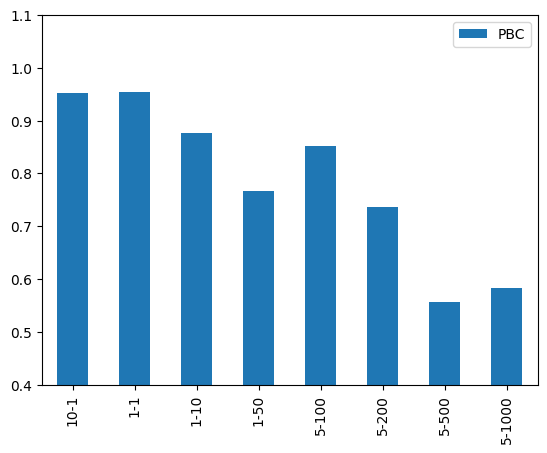

In [44]:
results_df.transpose().plot(kind="bar", ylim = (0.4, 1.1))

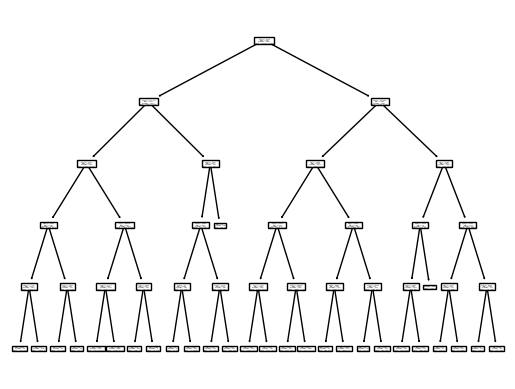

In [45]:
_ = plot_tree(results_list_class_weight_bank[0][5]['tree-clf'])

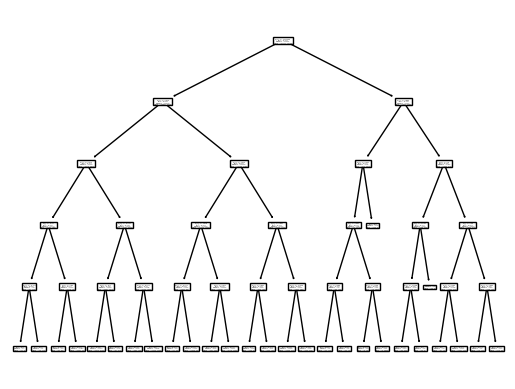

In [46]:
_ = plot_tree(results_list_class_weight_bank[0][2]['tree-clf'])

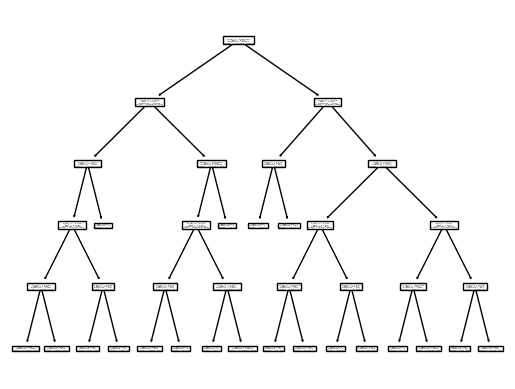

In [47]:
_ = plot_tree(results_list_class_weight_bank[0][0]['tree-clf'])

# Wyniki

## Wnioski:

Critetion:
Entropy pokazał na PCB trochę lepszy wynik, niż gini.
Dodatkowo zobaczyłem że ten hyperparametr wpływa na strukture drzewa (PCB).

Max_depth:
PBC z głębokością 5 i 10 daje podobne, jeśli nie lepsze, wyniki do braku max'a. Możliwie to się dzieje dlatego, 
że zamiast dopasywawania do wszystkich danych drzewo musi generalizować, co i powoduje dobrzy wynik.

min_sample_leaves:
Oczywiście wartości bardzo bliskie do liczby wszystkich samplów, to drzewo się nie wyuczy. 
Polepszył się rezultat dla PCB przy min_sample_leaves = 10. Myślę że ten hyperparametr musi być zależny od liczby
samplów i być mniejszy od niego. To pozwoli uniknąć sytuacji, kiedy drzewo będzie robiło siębie 'wyjątki'

cpp_alpha:
Dobra wartość tego parametru zależy od tego, jak dobrze separowane są dane lub w jakiej stopniu one są chaotyczne. 
W przypadku zbioru IRIS ten hyperparam nie miał dużego wpływu dopóki nie stał tak duży(>= 0.5), że redukował całe drzewo
tylko do korzenia. 
Dla PBC wartość cpp_alpha, od którego drzewo staje się korzeniem jest znaczniej mniejsa ( >= 0.01 ), jednak udało się 
wykryć wartość, polepszającą wynik - 0.0001	

cross_val:
Do IRIS stratified dał lepsze wyniki, możliwie to wynika z tego, że błąd predykcji jednych klas zostaje
zgładzony błądem predykcji innych klas i tak, klasyfikator nie zawsze dobrze predykuje klasy 1 i 2.

W przypadku PCB wyniki prawie takie same, ale lepszy wynik już dla braku stratyfikacji. Najprawdopodobniej
patrzymy tutaj na podobny efekt, jak dla IRIS.

class_weights:
W przypadku wartości None i 'balanced' IRIS dał takie same wyniki, dla PCB None dał lepszy rezultat

Dla IRIS widoczne są dziwne rzeczy że, chociaż liczba instancji klas jest taka sama dla co klasy, wagi 1-2-3 
dla poszczególnych klas poprawia wynik f1 score do 1. Klasy 1 i 2 tutaj to klasy, które są blisko siebie i
najprawdopodobniej wagi dla nich dopomogają ich bardziej wyróźnic, ale też możliwie że to jest skutek tego,
że dzięki wagom model się przeucza na tych podobnych klasach.

Dla PCB nie udało się polepszyć wyniki przy pomocy wag. To może wynikać z tego, że klasa 1, chociaż ma miejsce 
gdzie jej instancje robią się w grupę, nie jest idealnie separowana od klasy 0, jak to było widocznie 
na wykresach PCA i T-SNE z poprzednich laboratoriów.

Note: niekture rezultaty zmieniły się po ponownym uruchomianiu notebooka.